In [1]:
import numpy as np
from pyIClab.engines.models import (
    DSM_SimpleEquilibriums,
    DSM_CompleteEquilibriums,
    load_input_data_for_test,
    builtin_diffusion_method,
    builtin_fill_column_with_eluent,
    )
from pyIClab import Eluent

In [2]:
def kmap(cE):
    
    return -1.0923 * np.log10(np.squeeze(cE)) + 1.7709


eluent = Eluent.HydroxideIsocratic('20 mM', name='KOH')

In [3]:
init_vessel_params = {'cE_fill': eluent([0])['OH[-1]']}
post_distribute_params = dict(A_diff=1e-5, E_diff=(5e-4,))

model_params = dict(
    N=2500,
    analyte='Dummy[-1]',
    x=-1.0923,
    competing_ions=('OH[-1]',),
    y=(-1,),
    Vm=1.25,
    fr=1.0,
    backflush=False,
    phase_ratio=.99,
    Q=125.0,
    length=15.0,
    ID=4.6,
    ignore_tiny_amount=1e-9,
    kmap=kmap,
    post_distribute=builtin_diffusion_method,
    init_vessel=builtin_fill_column_with_eluent,
    post_distribute_params=post_distribute_params,
    init_vessel_params=init_vessel_params,
    )
model1 = DSM_SimpleEquilibriums(**model_params)
model2 = DSM_CompleteEquilibriums(**model_params)

/Users/kennyzhang/miniconda3/envs/pyiclab/lib/python3.11/site-packages/pyIClab/engines/models.py:770: UserWarning: 
This model supports single/double-charged analytes.
Processing an analyte & an elueting ion with an effective charge ratio x/y = 1.092 on this model is not stable. You may encounter low computational efficiency and numerical issues.
  warnings.warn(


In [4]:
sample_params = dict(
    eluent=eluent,
    V_sample='25 uL',
    cA_sample='.1 mM',
    cE_sample=('1e-4 mM',),
    tmax='7 min',
    )

In [5]:
load_input_data_for_test(model=model1, **sample_params)
load_input_data_for_test(model=model2, **sample_params)

  0%|          | 0/14000 [00:00<?, ?it/s]

(<Figure size 2400x900 with 2 Axes>,
 <Axes: xlabel='Time, min', ylabel='[A], mM'>)

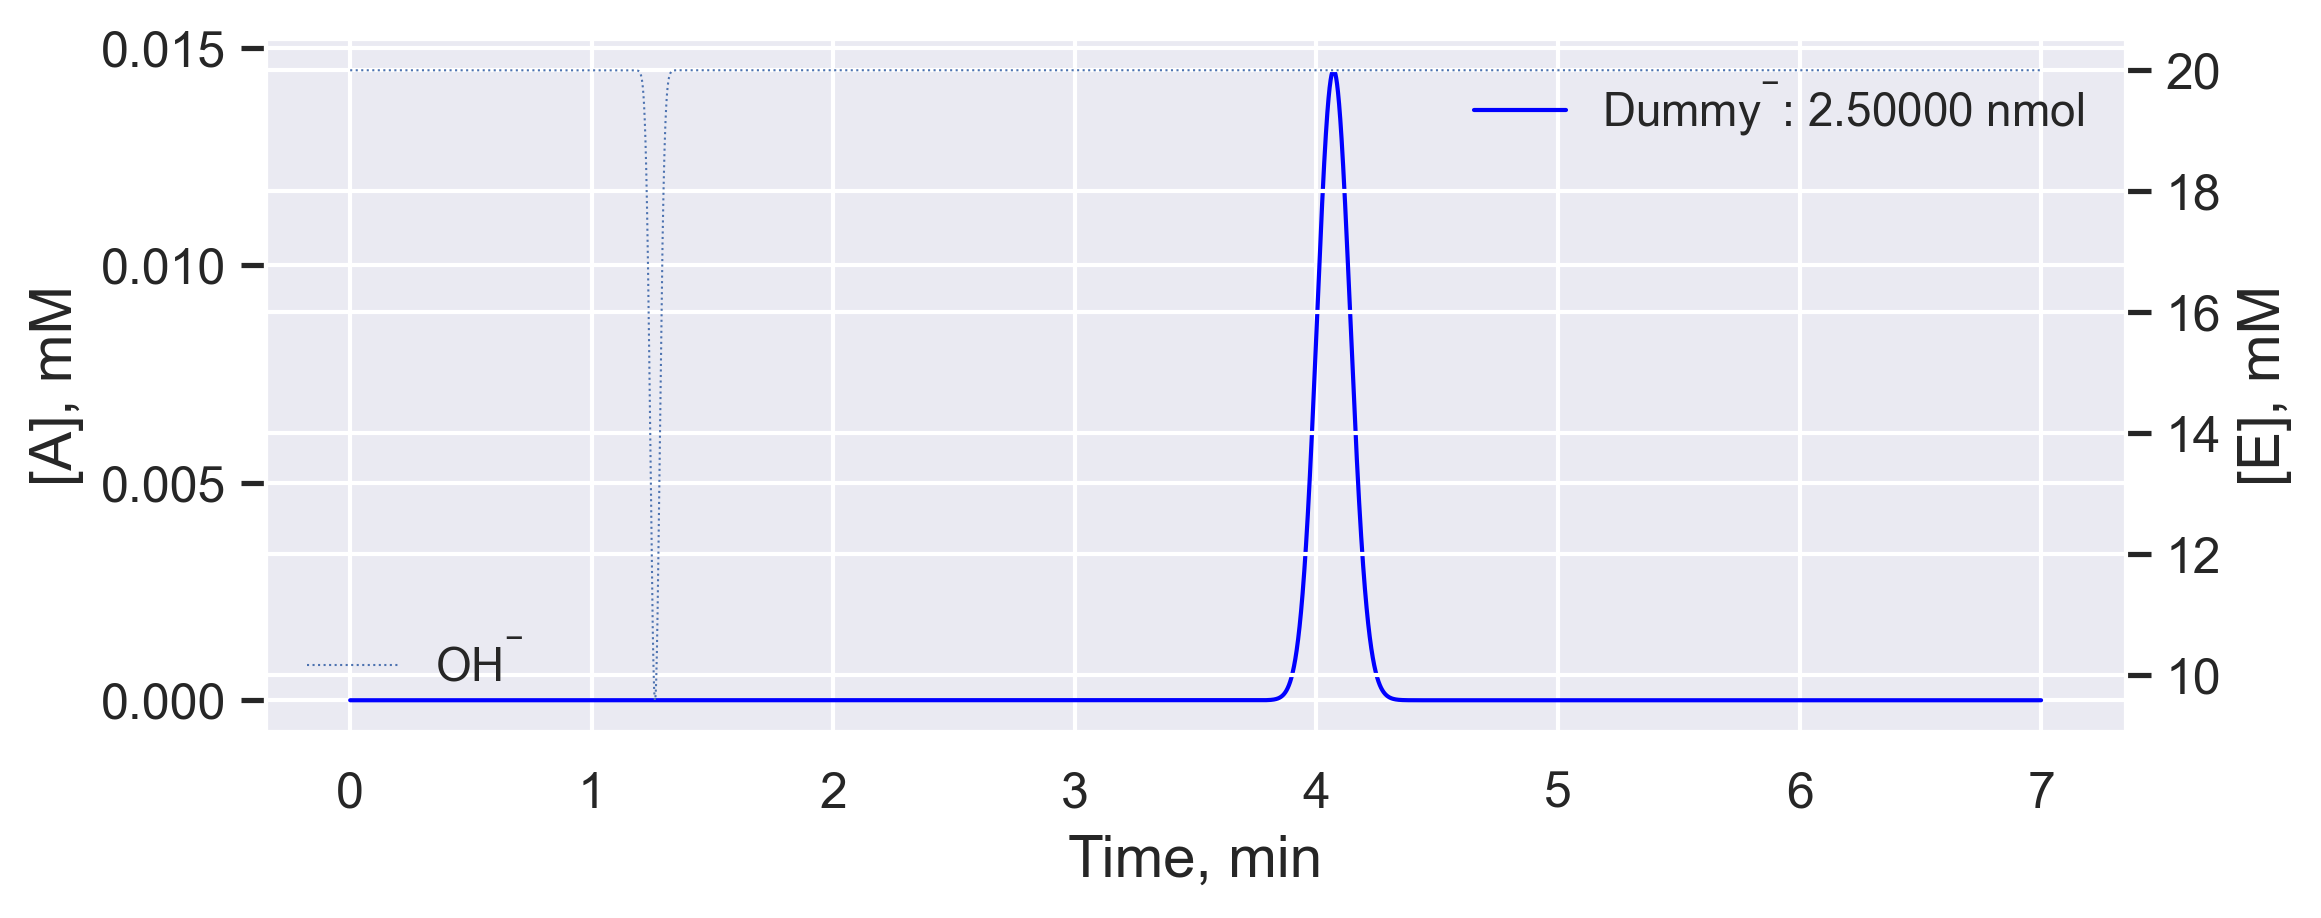

In [6]:
model1.standby()
model1.activate()
model1.plot()

  0%|          | 0/14000 [00:00<?, ?it/s]

/Users/kennyzhang/miniconda3/envs/pyiclab/lib/python3.11/site-packages/scipy/optimize/_nonlin.py:368: RuntimeWarning: invalid value encountered in scalar divide
  and dx_norm/self.x_rtol <= x_norm))


(<Figure size 2400x900 with 2 Axes>,
 <Axes: xlabel='Time, min', ylabel='[A], mM'>)

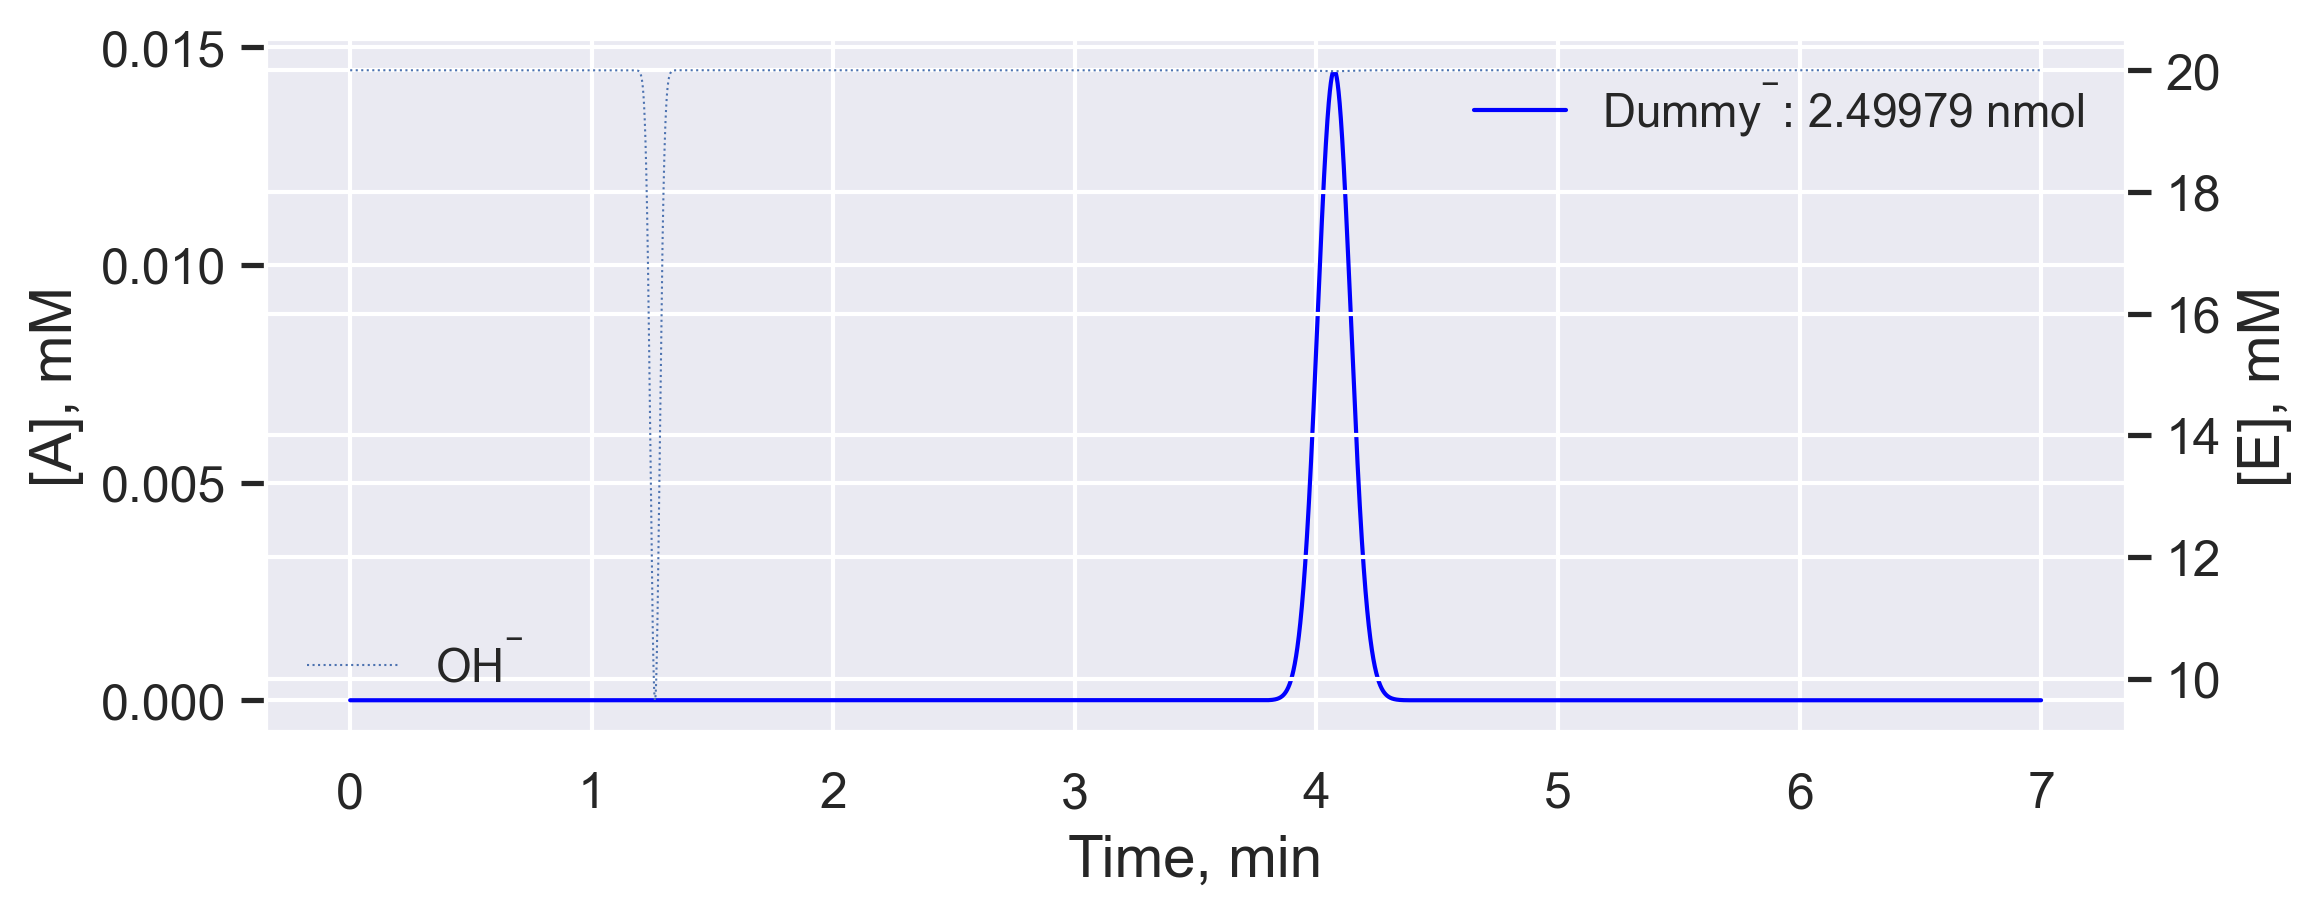

In [7]:
model2.standby()
model2.activate()
model2.plot()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_rcconfig = {
    'figure.figsize': [8, 4],
    'figure.dpi': 300.0,
    'axes.linewidth': 1.0,
    'axes.labelsize': 14,
    'font.family': 'Arial',
    'lines.linewidth': 1.0,
    'legend.frameon': False,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'mathtext.default': 'regular',
    'mathtext.fontset': 'dejavusans',
    'text.usetex': False,
    }

sns.set()
plt.rcParams.update(custom_rcconfig)

Text(0.5, 0.98, '25 μL Injection of 0.1 mM Dummy Anion')

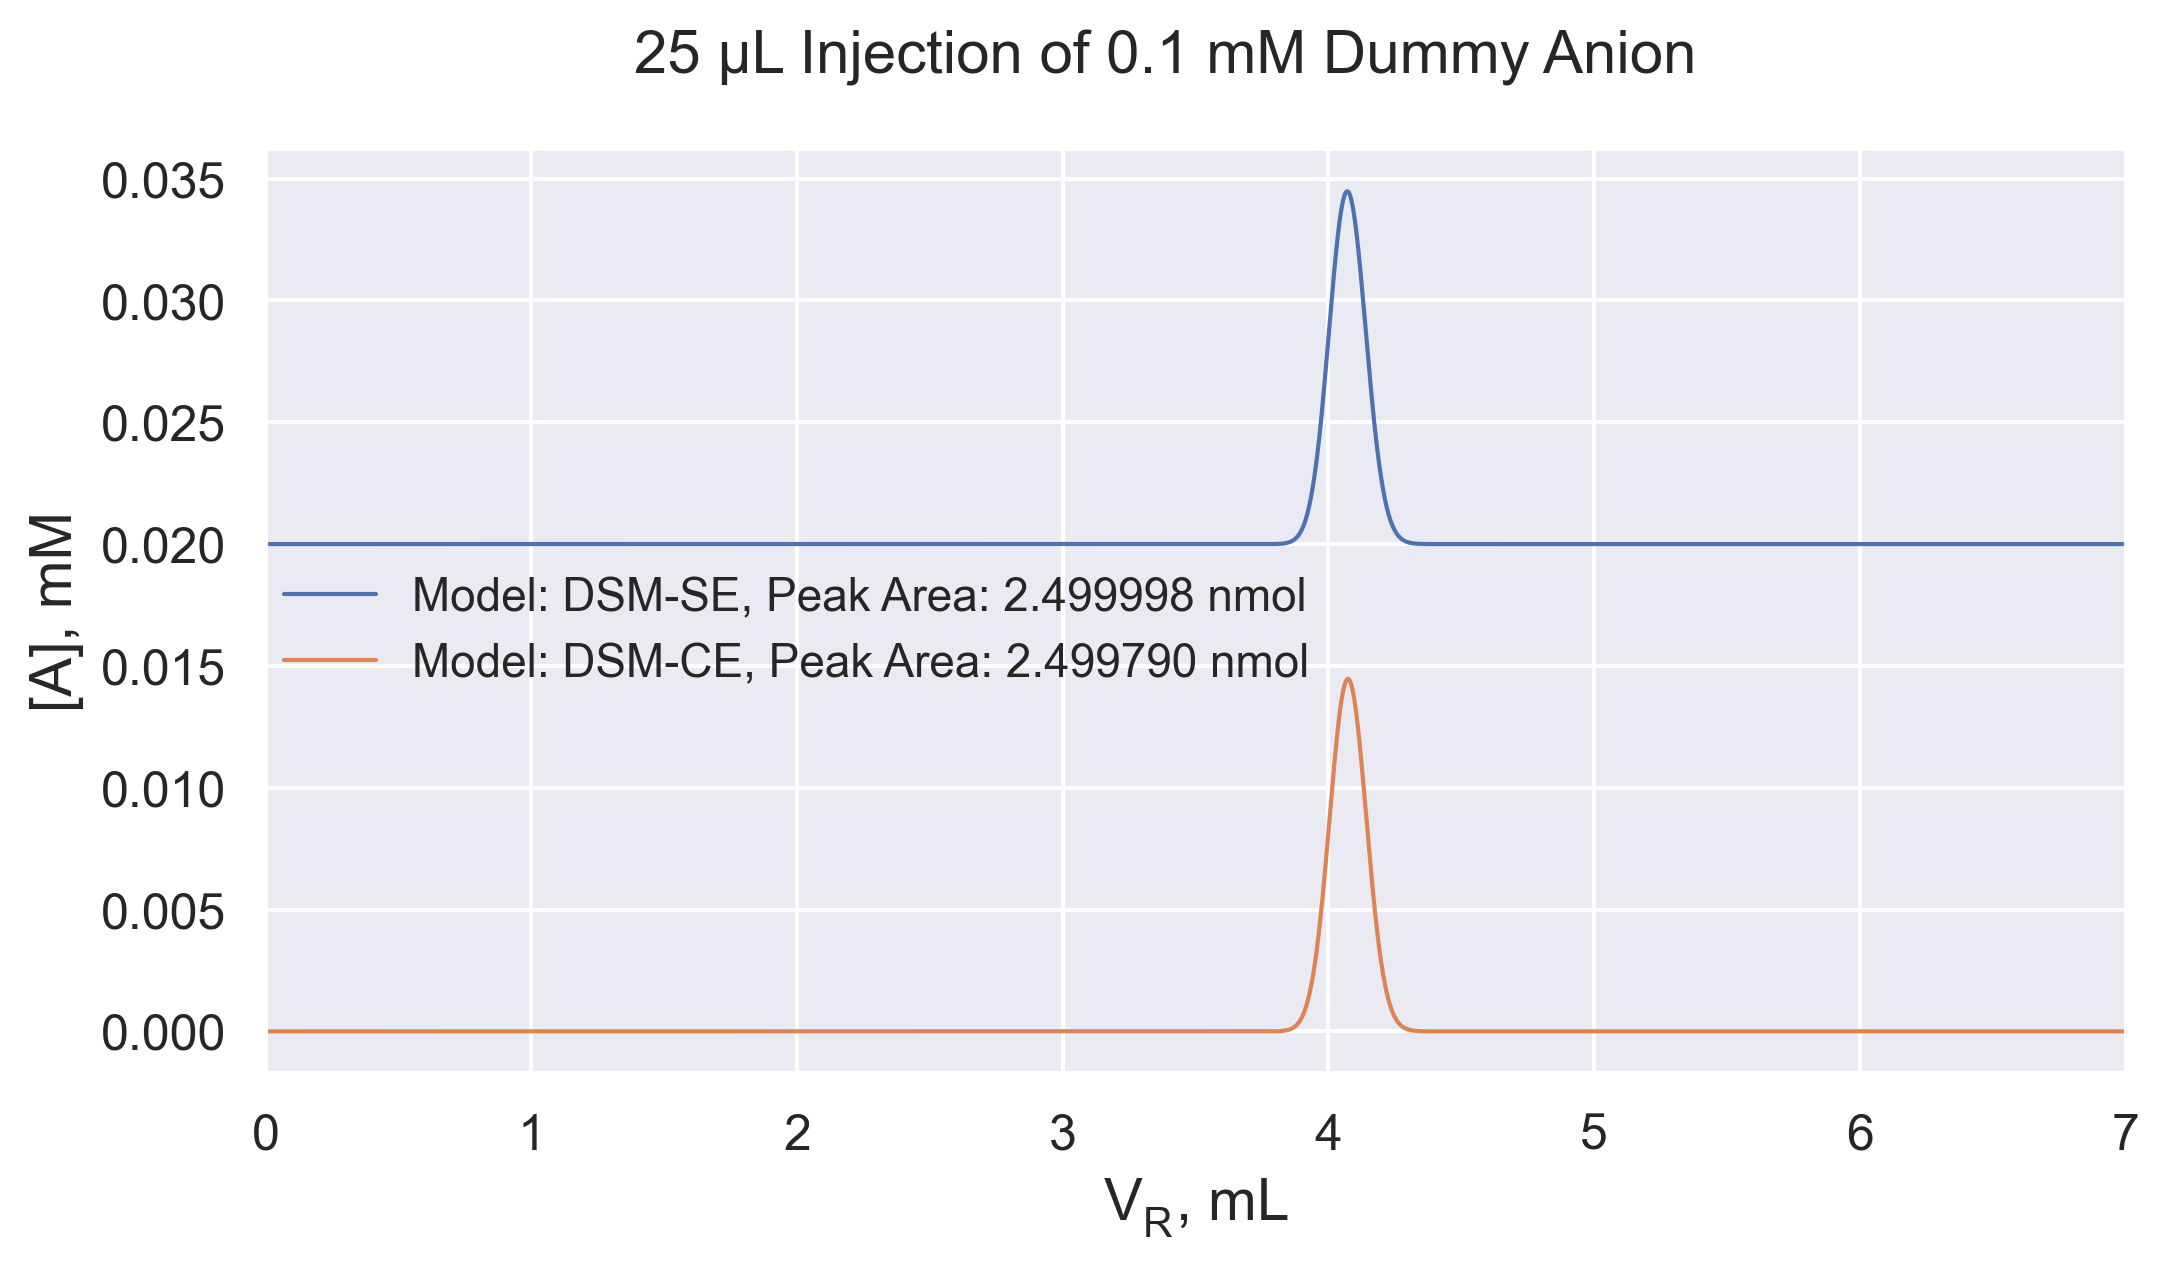

In [9]:
t = np.arange(len(model1.output.cA)) * model1.dt
c1 = model1.output.cA
c2 = model2.output.cA

fig, ax = plt.subplots()
ax.plot(t, c1 + .02,
    label=f'Model: DSM-SE, Peak Area: {sum(model1.output.cA*model1.dVm):7f} nmol'
    )
ax.plot(t, c2,
    label=f'Model: DSM-CE, Peak Area: {sum(model2.output.cA*model1.dVm):7f} nmol'
    )
ax.legend(loc=(0, .4))
ax.set_xlabel(r'$V_{R}$, mL') # Fr = 1 mL/min
ax.set_ylabel('[A], mM')
ax.set(xlim=(0, 7))
fig.suptitle('25 μL Injection of 0.1 mM Dummy Anion')